# In this notebook, I will write code to implement option pricing using QuantLib-Python library 

## 1. Plain Vanilla Call Option

In [85]:
from QuantLib import *

In [86]:
today = Date(14, March, 2019)
Settings.instance().evaluationDate = today
print(today)

March 14th, 2019


First we take a look at available class and function in QuantLib-Python library. Most of them have the same name as class implemented in C++. 
To understand QuantLib Implementation, it is necessary to understand the class inheritance in C++ before performing language "Sandwich" implementation in Python.

We will price A European Option in this implementation. Several parameters needed to be take into account:
- Stock quote
- Interest quote
- Volatility quote

- Payoff object
- Exercise object

- Yield Curve/Term Structure
- Volatility Structure
- Underlying Process/ Stock Process
- Pricing Engine

In this example, I will price option with following parameters:
- Stock quote: 100
- Interest quote: 0.01 pa
- Volatility quote: 0.20 pa

- Payoff object:
- Exercise object:

- Yield Curve/Term Structure: Flat Term Structure (Spot rate = Forward rate)
- Volatility Structure: Constant volatility Structure
- Underlying Process/ Stock Process: Stock Price follows Lognormal Distribution
- Pricing Engine: Analytical Pricing Engine from Black-Scholes.

In [87]:
# payoff object
payoff = PlainVanillaPayoff(Option.Call, 100)
# exercise object
exercise = EuropeanExercise(Date(14,June,2019))
# option object
option = EuropeanOption(payoff, exercise)

In [88]:
# Stock SimpleQuote Object
u = SimpleQuote(100.0)
# Risk free rate SimpleQuote Object
r = SimpleQuote(0.01)
# Volatility SimpleQuote Object
sigma = SimpleQuote(0.20)

# check value
print(u.value())
print(r.value())
print(sigma.value())

100.0
0.01
0.2


In [89]:
# Term Structure Object
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
# Volatility Structure Object
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())
# Note about the arguments necessary for those two functions
# referenceDate(), calendar(), settlementDays()

# We need Handle object to track/observe the changes in quotes. Pass Handle Objects to BLackScholesProcess constructor
process = BlackScholesProcess(QuoteHandle(u), 
                              YieldTermStructureHandle(riskFreeCurve), 
                              BlackVolTermStructureHandle(volatility))

In [90]:
# Pricing Engine 
engine = AnalyticEuropeanEngine(process)
# Set Pricing Engine for option object
option.setPricingEngine(engine)

In [91]:
# Option Value
print(option.NPV())

4.155543462156206


In [92]:
# Other parameters could be achieved using member function of option object
print(option.delta())
print(option.gamma())
print(option.vega())

0.5302223303784392
0.03934493301271913
20.109632428723106


## 2. Changing parameters 

Market data is stored in Quote instances and thus can notify the option when any of them changes. Just change the quote and the price will changed accordingly. Below, I change the value of initial stock price, the risk free rate and the volatility. The price calculated changes accordingly.

In [93]:
u.setValue(105)
r.setValue(0.02)
sigma.setValue(0.25)

print(u.value())
print(r.value())
print(sigma.value())

105.0
0.02
0.25


In [94]:
print(option.NPV())

8.367366802631873


I will plot the change of option value with respect to change in parameters in the model.

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import utils

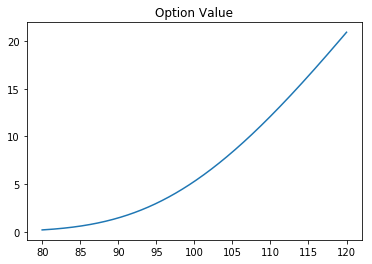

In [96]:
# Stock Price changes
f, ax = plt.subplots()
xs = np.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title("Option Value")
ax.plot(xs,ys)

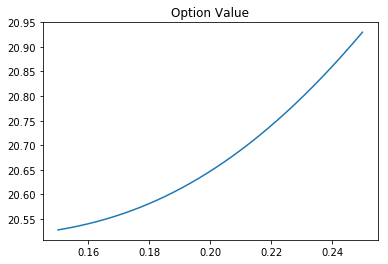

In [97]:
# Volatility changes
f, ax = plt.subplots()
xs = np.linspace(0.15,0.25,400)
ys = []
for x in xs:
    sigma.setValue(x)
    ys.append(option.NPV())
ax.set_title("Option Value")
ax.plot(xs,ys)

In [98]:
# Move the option forward
print("Initial Date",Settings.instance().evaluationDate)
Settings.instance().evaluationDate = Date(7, April, 2019)
print("New Date", Settings.instance().evaluationDate)

Initial Date March 14th, 2019
New Date April 7th, 2019


In [99]:
# New Option Price
u.setValue(100)
r.setValue(0.01)
sigma.setValue(0.25)
print(option.NPV())

4.39017750136621
